In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

(0) Load

In [2]:
file = '/Users/robertpinochetgomez/GitHub/01-linear-regression/01-datasets/auto-mpg.parquet'

df_auto = pd.read_parquet(file)

print(df_auto.info())
df_auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


(1) Simple Linear Regression

| Assumption           | What to Look For                         | How to Check                           |
| -------------------- | ---------------------------------------- | -------------------------------------- |
| **Linearity**        | Straight-line relationship               | Residuals vs Fitted plot (no curve)    |
| **Homoscedasticity** | Constant spread of errors                | Residuals vs Fitted plot (even spread) |
| **Normality**        | Bell-shaped error distribution           | Histogram or Q-Q plot of residuals     |
| **Independence**     | Errors aren’t correlated with each other | Durbin-Watson statistic                |


- Model on statsmodel library in order to check the assumptions


- - how horsepower affects to mpg

In [3]:
# how horsepower affects to mpg
# in order to not have errors
df_simple_linear_regression = df_auto[['mpg', 'horsepower']].dropna() 

# Feature (independent variable) and target (dependent variable)
X = df_simple_linear_regression[['horsepower']]
y = df_simple_linear_regression['mpg']

# Add a constant (intercept) term to the independent variable (X)
X_with_intercept = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X_with_intercept).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 04 May 2025   Prob (F-statistic):           7.03e-81
Time:                        19:39:22   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

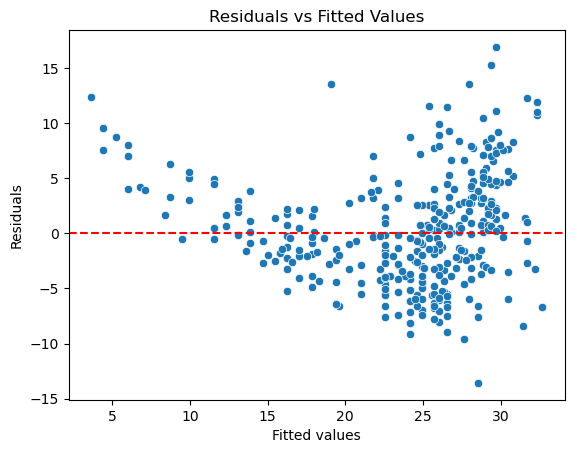

In [4]:
# Linearity & Homoscedasticity
# Residuals (difference between actual and predicted values)
y_pred = model.fittedvalues
residuals = model.resid

# Plot residuals vs fitted values
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

Values are not randomly point and they have not a constant spread for every fitted value (that's not good). It is heteroscedasticity

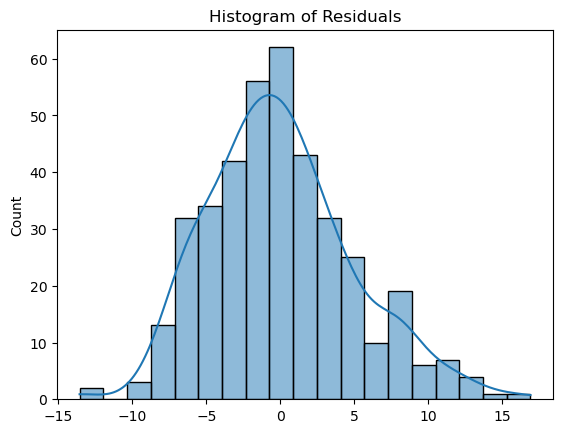

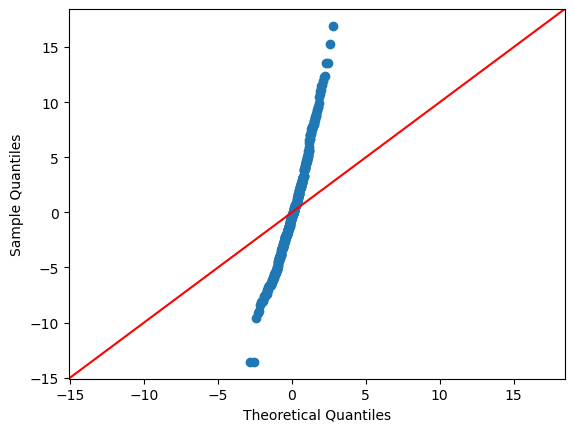

In [5]:
# Normality of residuals
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

# Q-Q plot (should show a straight line if normal)
sm.qqplot(residuals, line ='45')
plt.show()

In [6]:
residuals.mean()

-7.250436079184696e-15

The histogram follows a normal distribution, but the qq plot not. That's why the mean of the residuals errors al closely to zero. So the assumptions are fine, because it is a straight line. 

- Looking other summary variables in order to create the multiple linear regression

In [7]:
# in order to not have errors
df_simple_linear_regression = df_auto[['mpg', 'acceleration']].dropna() 

# Feature (independent variable) and target (dependent variable)
X = df_simple_linear_regression[['acceleration']]
y = df_simple_linear_regression['mpg']

# Add a constant (intercept) term to the independent variable (X)
X_with_intercept = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X_with_intercept).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     84.96
Date:                Sun, 04 May 2025   Prob (F-statistic):           1.82e-18
Time:                        19:39:23   Log-Likelihood:                -1343.9
No. Observations:                 398   AIC:                             2692.
Df Residuals:                     396   BIC:                             2700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.9698      2.043      2.432   

In [8]:
# in order to not have errors
df_simple_linear_regression = df_auto[['mpg', 'weight']].dropna() 

# Feature (independent variable) and target (dependent variable)
X = df_simple_linear_regression[['weight']]
y = df_simple_linear_regression['mpg']

# Add a constant (intercept) term to the independent variable (X)
X_with_intercept = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X_with_intercept).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Sun, 04 May 2025   Prob (F-statistic):          2.97e-103
Time:                        19:39:23   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3174      0.795     58.243      0.0

In [9]:
# in order to not have errors
df_simple_linear_regression = df_auto[['mpg', 'displacement']].dropna() 

# Feature (independent variable) and target (dependent variable)
X = df_simple_linear_regression[['displacement']]
y = df_simple_linear_regression['mpg']

# Add a constant (intercept) term to the independent variable (X)
X_with_intercept = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X_with_intercept).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     725.0
Date:                Sun, 04 May 2025   Prob (F-statistic):           1.66e-91
Time:                        19:39:23   Log-Likelihood:                -1175.5
No. Observations:                 398   AIC:                             2355.
Df Residuals:                     396   BIC:                             2363.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           35.1748      0.492     71.519   

In [10]:
# in order to not have errors
df_simple_linear_regression = df_auto[['mpg', 'cylinders']].dropna() 

# Feature (independent variable) and target (dependent variable)
X = df_simple_linear_regression[['cylinders']]
y = df_simple_linear_regression['mpg']

# Add a constant (intercept) term to the independent variable (X)
X_with_intercept = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X_with_intercept).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     597.1
Date:                Sun, 04 May 2025   Prob (F-statistic):           4.50e-81
Time:                        19:39:23   Log-Likelihood:                -1199.6
No. Observations:                 398   AIC:                             2403.
Df Residuals:                     396   BIC:                             2411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.9493      0.833     51.557      0.0

So, i'm going to take horsepower, weight, displacement, cylinders. 

(2) Multiple Linear Regression

In [11]:
# Choose predictors and response
df_auto_mlr = df_auto.dropna()

X = df_auto_mlr[['cylinders', 'displacement', 'horsepower', 'weight']] 
y = df_auto_mlr['mpg']

# Add constant (intercept term)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     234.2
Date:                Sun, 04 May 2025   Prob (F-statistic):          6.18e-102
Time:                        19:39:23   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2250.
Df Residuals:                     387   BIC:                             2270.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.7568      1.520     30.102   

According to last results, we are going to keep only horsepower and weight, because the statistical test shows that the other ones, were not significant. 

In [12]:
# Choose predictors and response
df_auto_mlr = df_auto.dropna()

X = df_auto_mlr[['horsepower', 'weight']] 
y = df_auto_mlr['mpg']

# Add constant (intercept term)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Sun, 04 May 2025   Prob (F-statistic):          3.06e-104
Time:                        19:39:23   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6402      0.793     57.540      0.0

F Statistic Test
✔️ Your overall regression model is statistically significant.
✔️ It’s much better than a model with no predictors.

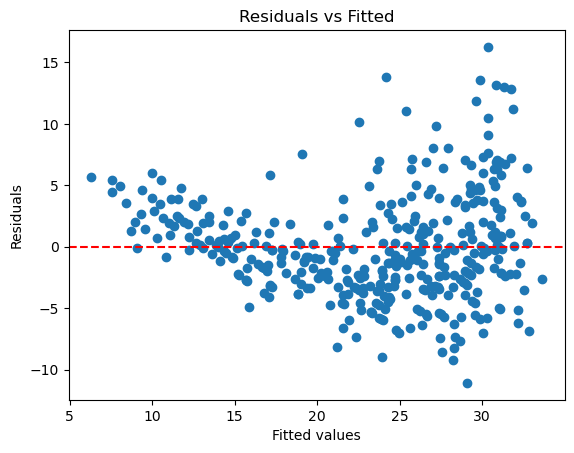

In [13]:
fitted_vals = model.fittedvalues
residuals = model.resid

plt.scatter(fitted_vals, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

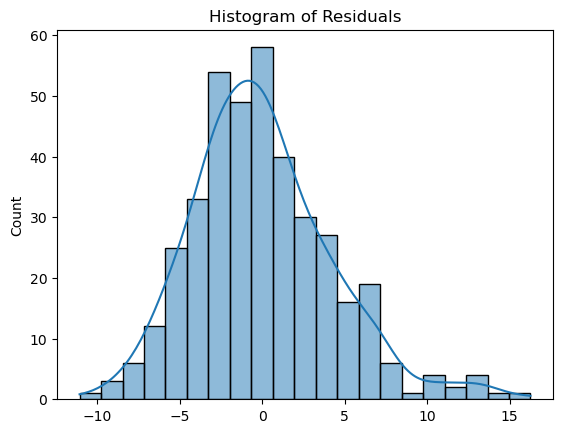

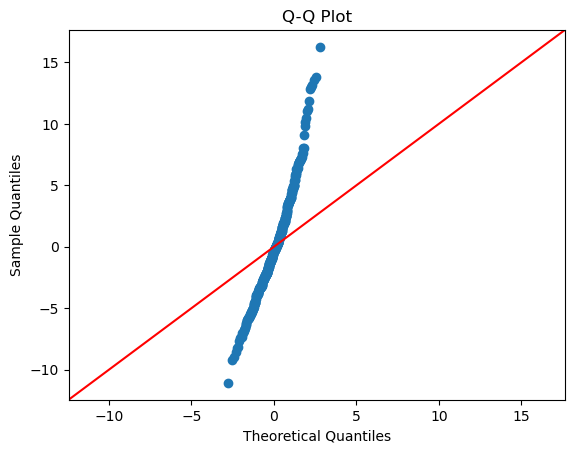

In [14]:
y_pred = model.fittedvalues
residuals = model.resid

# Histogram
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot")
plt.show()

In [15]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]
print(vif_data)

      feature        VIF
0       const  13.717674
1  horsepower   3.959228
2      weight   3.959228


(3) Conclusions

Como conclusión, las variables más útiles para explicar el comportamiento de mpg son horsepower y weight. A pesar de no haber cumplido el 100% con los supuestos, el test estadístico F nos dice que es mejor que la media o que un modelo sin predictores. Ahora vamos a ir paso por paso:
- El modelo con las variables de horsepower y weight, explican el 100% de la variabilidad de mpg. En donde, el test estadístico F, nos demuestras significativamente que el modelo es mejor que solo la media o un modelo sin predictores.
- Por otro lado, las constantes de horsepower y weight, rechazan la hipótesis de que su valor pueda ser cero, y además, el intervalo de confianza es bastante ajustado (es decir, no es disperso, lo que puede generar incertidumbre). Reforzado por el test estadístico T, diciéndonos que tan alejado están los coeficientes del cero. 
- Por otro, el Test Durbin Watson nos dice que existe correlación entre las variables, lo cual no es bueno, pero desde la perspectival del test VIF es moderada, por lo tanto es aceptada. 
- Sobre los residuos, no se encuentran aleatoriamente distribuidos y con una varianza constante, pero lo interesantes es que es desde mpg < 20, lo cual puede indicar a que el modelo no es 100% lineal, tal cual se demuestra en los scatterplots del exploratory analysis. Y de hecho, eso demuestra la distribución de los residuos... es decir, sigue una normal, pero no de manera lineal. 
- Esto se puede transformar con feature engineering, para poder seguir la porción de la curva que queda fuera. 

In [16]:
# Create grid for surface
hp_range = np.linspace(df_auto_mlr['horsepower'].min(), df_auto_mlr['horsepower'].max(), 30)
wt_range = np.linspace(df_auto_mlr['weight'].min(), df_auto_mlr['weight'].max(), 30)
hp_grid, wt_grid = np.meshgrid(hp_range, wt_range)

# Predict over grid
grid_df = pd.DataFrame({
    'const': 1,
    'horsepower': hp_grid.ravel(),
    'weight': wt_grid.ravel()
})
mpg_pred = model.predict(grid_df).values.reshape(hp_grid.shape)

# Create interactive plot
fig = go.Figure()

# Add surface (regression plane)
fig.add_trace(go.Surface(
    x=hp_grid,
    y=wt_grid,
    z=mpg_pred,
    colorscale='Reds',
    opacity=0.6,
    name='Regression Plane'
))

# Add actual data points
fig.add_trace(go.Scatter3d(
    x=df_auto_mlr['horsepower'],
    y=df_auto_mlr['weight'],
    z=df_auto_mlr['mpg'],
    mode='markers',
    marker=dict(size=4, color='blue'),
    name='Actual Data'
))

fig.update_layout(
    title='Interactive 3D Regression Plot: MPG ~ Horsepower + Weight',
    scene=dict(
        xaxis_title='Horsepower',
        yaxis_title='Weight',
        zaxis_title='MPG'
    ),
    width=900,
    height=700
)

fig.show()

(4) Experimentation: Si las variables siguen una función exponencial, convirtiéndola a una lineal aplicándole logaritmo, mejorará el modelo?

In [17]:
# Choose predictors and response
df_auto_mlr = df_auto.dropna()

X = np.log(df_auto_mlr[['horsepower', 'weight']])
y = np.log(df_auto_mlr['mpg'])

# Add constant (intercept term)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     758.7
Date:                Sun, 04 May 2025   Prob (F-statistic):          5.49e-135
Time:                        19:39:23   Log-Likelihood:                 178.65
No. Observations:                 392   AIC:                            -351.3
Df Residuals:                     389   BIC:                            -339.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1095      0.286     35.330      0.0

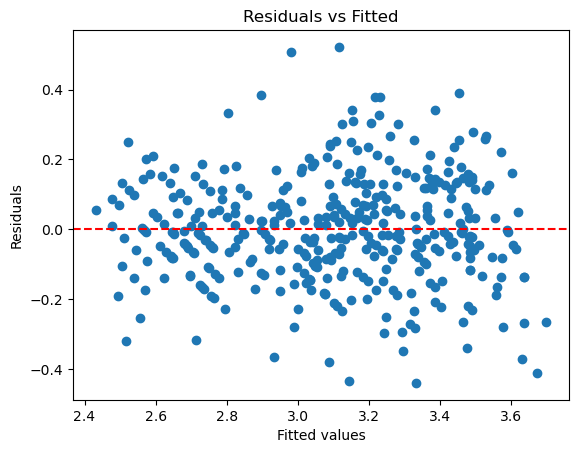

In [18]:
fitted_vals = model.fittedvalues
residuals = model.resid

plt.scatter(fitted_vals, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

Se cumple la homocedasticidad y linealidad

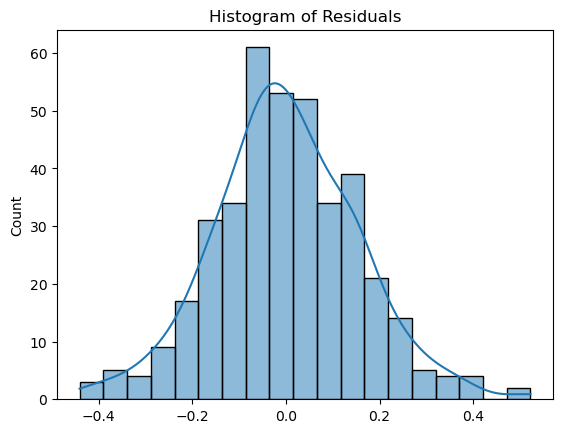

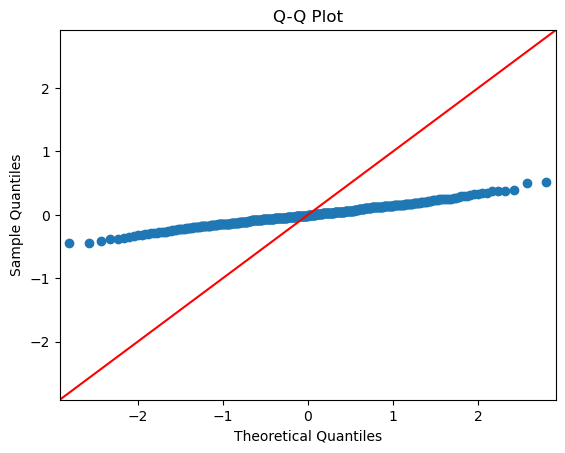

In [19]:
y_pred = model.fittedvalues
residuals = model.resid

# Histogram
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot")
plt.show()

Oh Hell Yes!